# Gradient Descent

Now that we have a fundamental understanding of derivatives, we can apply it to a widely used algorithm across optimization and machine learning. **Gradient descent** allows us to minimize or maximize a function using an iterative process leveraging the slope of each variable. Typically for machine learning, we are trying to minimize a loss function or maximize likelihood. We will start with a trivial example and then apply it to linear regression. We will also talk about stochastic gradient descent and what to expect with more complex models like deep learning. 

## Understanding Gradient Descent

Imagine you were in a mountain range at night with only a flashlight. You know that to get back to town safely, you have to get to the valley, the lowest point in the mountain range. You use the flashlight to eye the slope around you in all directions, and you step in the direction that descends the most. You take bigger steps for bigger slopes, and smaller steps for smaller slopes. Eventually, you will get to a low point in the mountain range **where the slope is 0**. 

img

Now consider a case where there is only one valley, or one minimum, in the entire mountain range. We call this a **convex** problem because there is only one minimum. Problems that are convex include linear regression, logistic regression, and linear programming problems. These are fairly straightforward to solve. 

img

Now consider a landscape that has several **local minima**, or multiple valleys we can get stuck in. Because these valleys will not reveal a slope that descends further, it is easy for gradient descent to get stuck in them. We call these types of problems **non-convex problems**, and they are much harder to solve. Problems that are non-convex include neural networks and deep learning. Typically stochastic gradient descent and other random-based techniques are used to cope with non-convex, and we will talk about this later. 

img

Metaphorically, the landscape is a mathematical function we are trying to find the lowest point for.

Let's apply gradient descent to a simple problem. 

## Simple Gradient Descent Example

Let's take this function: 

$
f(x) = 3 \left(x + 1\right)^{2} + 1
$ 

Here it is plotted in SymPy:

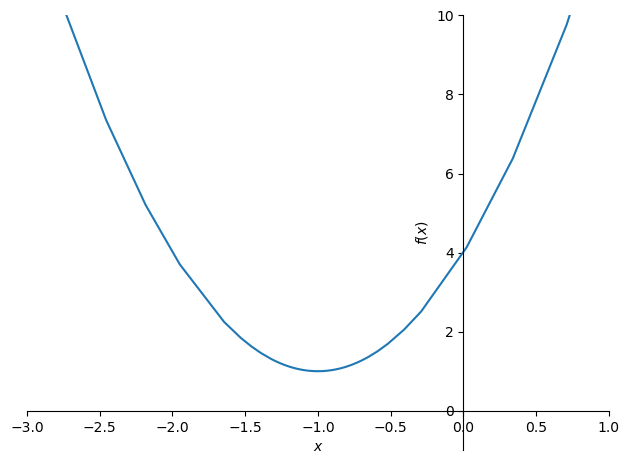

In [13]:
from sympy import * 

x = symbols('x')
f = 3*(x+1)**2 + 1
plot(f, xlim=(-3,1), ylim=(-1,10))

We could solve this algebraically by first taking the derivative of the function with respect to $ x $, and then solve for where the slope is $ 0 $. 

In [15]:
from sympy import * 
from sympy.solvers import solve 

x = symbols('x')
f = 3*(x+1)**2 + 1
dx = diff(f, x)

solve(dx, x)

[-1]

While we have a shortcut to solve this simple problem, we do not have shortcuts for more complex machine learning problems where we need to use gradient descent. But we can understand gradient descent first by applying it to a simple problem like this one. 

We are still going to use the derivative of the function, but we are going to start a searching algorithm at a random location for $ x $ that is reasonably in the vicinity of the solution. Below we will initialize a random $ x $ but contain it in the range of our graph above for visual consistency. We will plot the tangent line for that starting $ x $ location. 

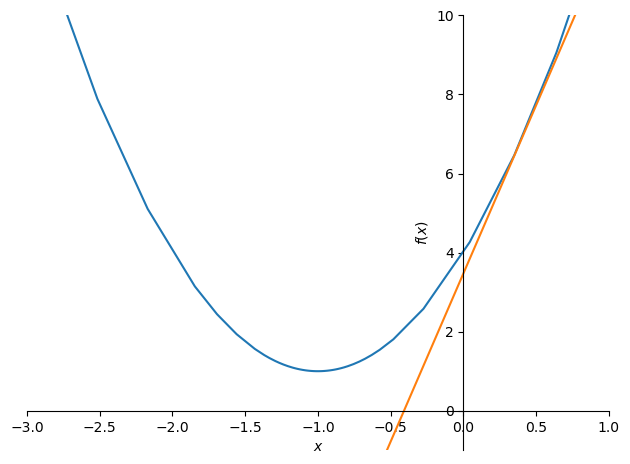

In [17]:
import random 

# start x at random location 
x_i = random.uniform(-3,1)

# calculate slope at random x 
# and tangent line 
m = dx.subs(x, x_i) 
b = -(m * x_i - f.subs(x, x_i))

plot(f, m*x+b, xlim=(-3,1), ylim=(-1,10))

Let's declare a **learning rate** of $ .05 $, which takes a fraction of the slope and subtracts it from our x-value. 

In [19]:
L = .0001

**Now run this code block below several time and watch what happens**. Pay attention to the $ x $ value and the tangent line. Where is it converging? 

x = 0.417565071344667


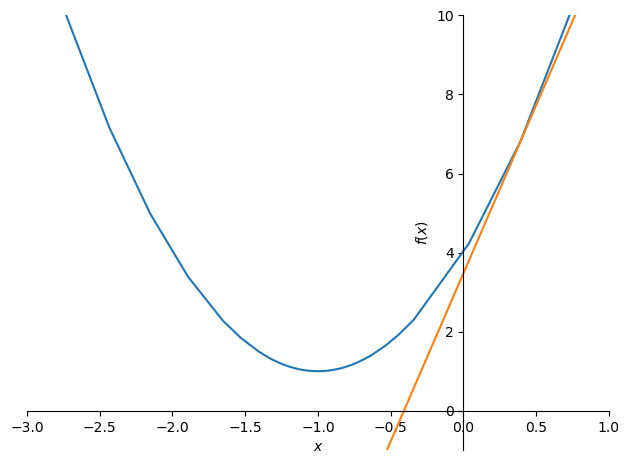

In [21]:
# run this code cell repeatedly 
x_i -= m * L 
m = dx.subs(x, x_i) 
b = -(m * x_i - f.subs(x, x_i))
print(f"x = {x_i}")
plot(f, m*x+b, xlim=(-3,1), ylim=(-1,10))

This searching for an $ x $ that gives us a slope of $ 0 $ on the tangent line, and thus the miniumum, is what we call gradient descent. Let's repackage all the code above into a `for` loop that does this 1000 times. You will see the line converges on the minimum.

x = -1.00000000000000


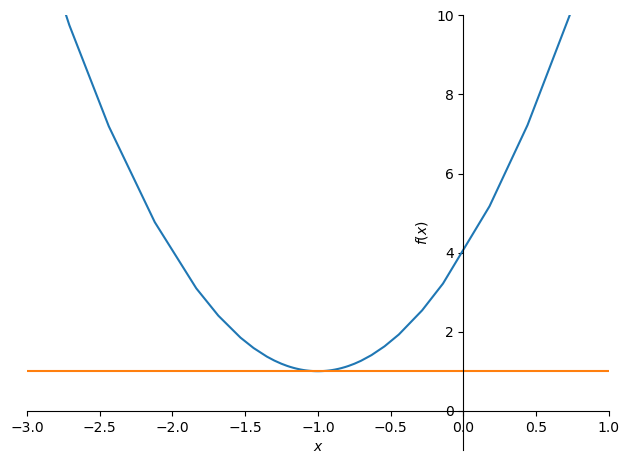

In [23]:
from sympy import * 
from sympy.solvers import solve 
import random 

# declare function and derivative
x = symbols('x')
f = 3*(x+1)**2 + 1
dx = diff(f, x) 

# declare learning rate 
L = .01

# start x at random location 
x_i = random.uniform(-3,1)

for i in range(1000):
    x_i -= m * L 
    m = dx.subs(x, x_i) 
    b = -(m * x_i - f.subs(x, x_i))

print(f"x = {x_i}")
plot(f, m*x+b, xlim=(-3,1), ylim=(-1,10))

So in the end, gradient descent is starting at a random location in our function (a random $ x $) and repeatedly subtracting the slope times the learning rate. 

But how do we choose a learning rate? 

### Choosing a Learning Rate 

The **learning rate** sets how aggressively you want the gradient descent algorithm to move towards the minimum. It is a fraction of the slope subtracted from the $ x $ value repeatedly until the function is minimized (if you are maximizing function, add the slope times the learning rate rather than subtract).

The larger the learning rate, the faster progress will happen but at the cost of accuracy. If it is too large, it may not converge to the minuimum at all as it would be like a giant stepping over the valley over and over. Having it too small will create more precision, but require more time and steps much like an ant descending into the valley. You need to find a balance of the two. Experiment with the learning rate above (e.g. $ .3 $ versus $ .001 $) to see how it affects the progress of gradient descent. 

## Multivariable Gradient Descent

Let's look at this multivariable function and plot it. 

$
f(x) = 5 x^{2} + 4 y^{2} + 1
$

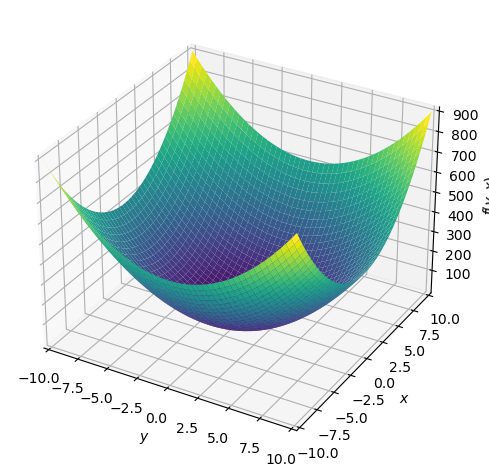

In [27]:
from sympy import * 
from sympy.plotting import plot3d

x, y = symbols('x y')

f = 5*x**2 + 4*y**2 + 1 

plot3d(f)

Again, we can algebraically solve for the minimum but let's practice using gradient descent with it. As we learned in the last section we can use partial derivatives to find the derivative with respect to each input variable. 

$ 
\Large \frac{\delta}{\delta x} = 10x
$   

$ 
\Large \frac{\delta}{\delta y} = 8y
$

In [29]:
from sympy import * 
from sympy.plotting import plot3d

x, y = symbols('x y')

f = 5*x**2 + 4*y**2 + 1 
dx = diff(f, x) 
dy = diff(f, y) 

In [30]:
dx

10*x

In [31]:
dy

8*y

Let's experiment with gradient descent in a similar manner we did earlier. First we declare our partial derivatives and a learning rate $ L = .05 $. We will also start $ x $ and $ y $ in a random location in the chart above. 

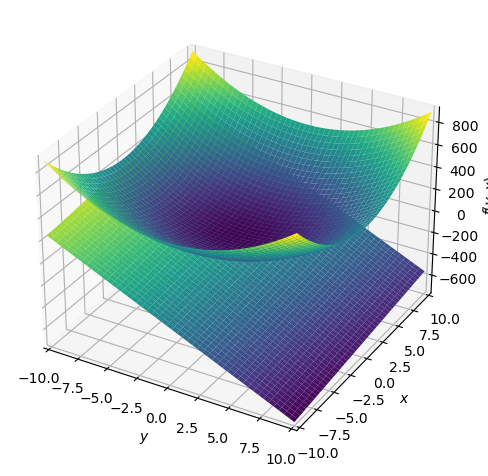

In [70]:
from sympy import * 
from sympy.plotting import plot3d
import random 

# declare function and derivative
x,y = symbols('x y')
f = 5*x**2 + 4*y**2 + 1 
dx = diff(f, x) 
dy = diff(f, y)

# declare learning rate 
L = .05

# start x at random location 
x_i = random.uniform(-10,10)
y_i = random.uniform(-10,10)

# plot 
dx_i = dx.subs(x, x_i)
dy_i = dy.subs(y, y_i) 
b = -(dx_i * x_i + dy_i * y_i - f.subs([(x, x_i), (y, y_i)]))

plot3d(f, dx_i*x + dy_i * y + b, xlim=(-10,10),ylim=(-10,10))

Run this block of code below repeatedly and you will see the linear plane, capturing the slope for both $ x $ and $ y $, drifting towards the minimum. 

x = 0.452985893498321, y = -3.67622235729251


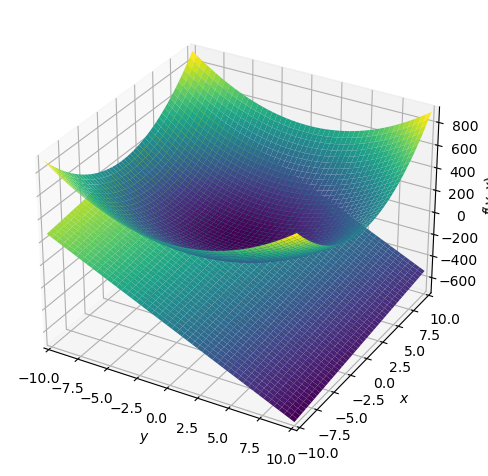

In [72]:
dx_i = dx.subs(x, x_i)
dy_i = dy.subs(y, y_i) 

x_i -= dx_i * L 
y_i -= dy_i * L 

b = -(dx_i * x_i + dy_i * y_i - f.subs([(x, x_i), (y, y_i)]))

print(f"x = {x_i}, y = {y_i}")
plot3d(f, dx_i*x + dy_i * y + b, xlim=(-10,10),ylim=(-10,10))

We can repackage all of this into a single Python script to perform this gradient descent. You will see that $ x $ and $ y $ converge very closely to $ (0,0) $. 

x = 7.58989565099423E-301, y = -6.68901004921588E-222


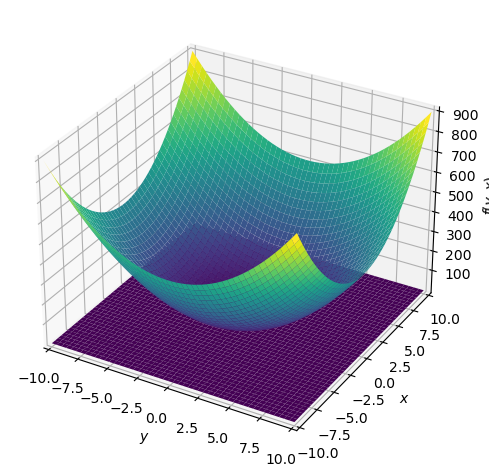

In [37]:
from sympy import * 
from sympy.plotting import plot3d
import random 

# declare function and derivative
x,y = symbols('x y')
f = 5*x**2 + 4*y**2 + 1 
dx = diff(f, x) 
dy = diff(f, y)

# declare learning rate 
L = .05

# start x at random location 
x_i = random.uniform(-10,10)
y_i = random.uniform(-10,10)

for i in range(1000):
    dx_i = dx.subs(x, x_i)
    dy_i = dy.subs(y, y_i) 

    x_i -= dx_i * L 
    y_i -= dy_i * L 

    b = -(dx_i * x_i + dy_i * y_i - f.subs([(x, x_i), (y, y_i)]))

print(f"x = {x_i}, y = {y_i}")
plot3d(f, dx_i*x + dy_i * y + b, xlim=(-10,10),ylim=(-10,10))

## Gradient Descent for Linear Regression 

Let's apply gradient descent to something a bit closer to real-world practice. While linear regression does have shortcut techniques like matrix decomposition, it is a good way to understand gradient descent for data-driven machine learning models. After all, neural networks are composed of linear functions inside nonlinear functions, whose slopes and intercepts (or weights and biases) are optimized with gradient descent. Let's practice with a single linear function.

A linear regression fits a line (or linear plane if there are multiple input variables) through some data. The **loss function** is what we are trying to minimize using gradient descent, and it typically will be the *sum of squares* or *mean of squares*. The **squared residuals** are the squared differences between each data point's $ y $ value and predicted $ y $ value from the line, which when summed or averaged make up the loss function. 

Here are the squared residuals visualized below for a given line and 15 data points. 

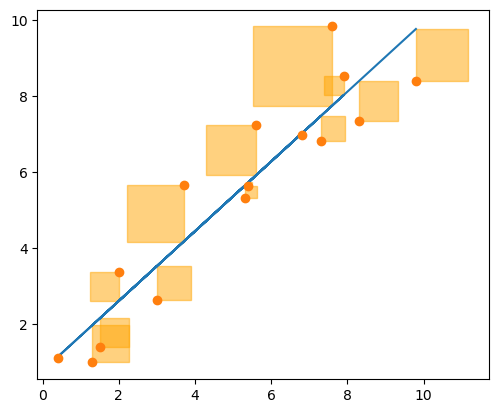

In [40]:
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# Extract input variables (all rows, all columns but last column)
X = np.array([9.8, 8.3, 5.3, 1.3, 3, 0.4, 5.4, 7.3, 3.7, 6.8, 5.6, 2,7.6, 7.9, 1.5])

Y = np.array([8.383017, 7.35061323, 5.31904498, 0.99811892, 2.64478489, 1.12535641,
 5.62574367, 6.82704871, 5.66768037, 6.98267837, 7.23655439, 3.36467504,
 9.82253924, 8.52430761, 1.39760223])

fig, ax = plt.subplots()
ax.set_aspect('equal')


# declare line coefficients
m, b = 0.9153874397162779, 0.7861238923689651

# plot squares 
for x,y in zip(X,Y): 
    residual = m*x+b - y
    ax.add_patch(Rectangle((x, y), residual, residual, alpha=.5, color='orange'))

plt.plot(X, m*X+b)
plt.plot(X, Y, 'o') # scatterplot
plt.show()

Let's use the sum of squares (the total of all the square areas above) as our loss function. 

$
\Large \text{SSE} = \sum_{i=0}^{n} (m x_i + b - y_i)^{2}
$ 

To see what the loss landscape looks like, let's use SymPy. As you can guess, we need to find the $ m $ and $ b $ values that will get us to the lowest point of this plot. 

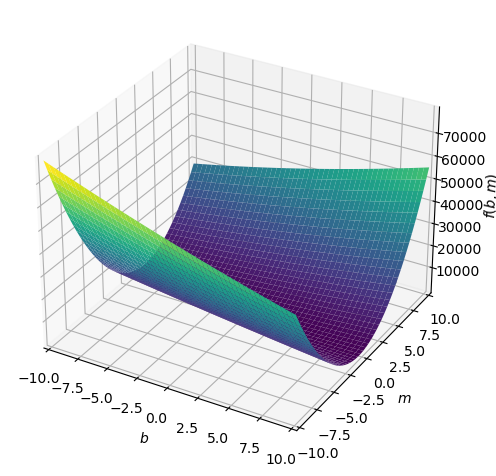

In [42]:
from sympy import *
from sympy.plotting import plot3d
import pandas as pd

m, b, i, n = symbols('m b i n')
x, y = symbols('x y', cls=Function)

sum_of_squares = Sum((m*x(i) + b - y(i)) ** 2, (i, 0, n)) \
    .subs(n, len(X) - 1).doit() \
    .replace(x, lambda i: X[i]) \
    .replace(y, lambda i: Y[i])

plot3d(sum_of_squares)

We will find the loss function's derivative with respect to $ m $ and with respect to $ b $ using SymPy. Notice how we can support multiple $ x $ and $ y $ values by specifying `cls=Function` to `symbols()`. We will then use the `Sum` operator to perform a summation that totals the squared differences between the actual $ y $ values and the predicted $ y $ values. 

In [44]:
from sympy import *

m, b, i, n = symbols('m b i n')
x, y = symbols('x y', cls=Function)

sum_of_squares = Sum((m*x(i) + b - y(i)) ** 2, (i, 0, n))

d_m = diff(sum_of_squares, m)
d_b = diff(sum_of_squares, b)

In [45]:
d_m

Sum(2*(b + m*x(i) - y(i))*x(i), (i, 0, n))

In [46]:
d_b

Sum(2*b + 2*m*x(i) - 2*y(i), (i, 0, n))

We can implement those two derivatives manually in NumPy as shown below, and use it to perform gradient descent. Notice how closely this resembles our multivariable gradient descent example earlier. We are 

In [48]:
import numpy as np 
import pandas as pd
from sympy import *

X = np.array([9.8, 8.3, 5.3, 1.3, 3, 0.4, 5.4, 7.3, 3.7, 6.8, 5.6, 2,7.6, 7.9, 1.5])

Y = np.array([8.383017, 7.35061323, 5.31904498, 0.99811892, 2.64478489, 1.12535641,
 5.62574367, 6.82704871, 5.66768037, 6.98267837, 7.23655439, 3.36467504,
 9.82253924, 8.52430761, 1.39760223])

# Building the model
m = 1.0
b = 1.0

# The learning Rate
L = .001

# The number of iterations
iterations = 100_000

n = float(len(X))  # Number of elements in X

# Perform Gradient Descent
for i in range(iterations):

    # slope with respect to m
    D_m = (2 * X * ((m * X + b) - Y)).sum()

    # slope with respect to b
    D_b = (2 * ((m * X + b) - Y)).sum()

    # update m and b
    m -= L * D_m
    b -= L * D_b
print(m, b)

0.9153874397162753 0.7861238923689817


If you want to keep using SymPy, just subsitute the data points into the derivative functions. By the nature of the summation implementation in SymPy, you will need to call `doit()` and then `lambdify()` to efficiently compile the derivative functions. 

In [50]:
import numpy as np 
import pandas as pd
from sympy import *

X = np.array([9.8, 8.3, 5.3, 1.3, 3, 0.4, 5.4, 7.3, 3.7, 6.8, 5.6, 2,7.6, 7.9, 1.5])

Y = np.array([8.383017, 7.35061323, 5.31904498, 0.99811892, 2.64478489, 1.12535641,
 5.62574367, 6.82704871, 5.66768037, 6.98267837, 7.23655439, 3.36467504,
 9.82253924, 8.52430761, 1.39760223])


m, b, i, n = symbols('m b i n')
x, y = symbols('x y', cls=Function)

sum_of_squares = Sum((m*x(i) + b - y(i)) ** 2, (i, 0, n))

d_m = diff(sum_of_squares, m) \
    .subs(n, len(X) - 1).doit() \
    .replace(x, lambda i: X[i]) \
    .replace(y, lambda i: Y[i])

d_b = diff(sum_of_squares, b) \
    .subs(n, len(X) - 1).doit() \
    .replace(x, lambda i: X[i]) \
    .replace(y, lambda i: Y[i])

# compile using lambdify for faster computation
d_m = lambdify([m, b], d_m)
d_b = lambdify([m, b], d_b)

# Building the model
m = 0.0
b = 0.0

# The learning Rate
L = .001

# The number of iterations
iterations = 100_000

# Perform Gradient Descent
for i in range(iterations):

    # update m and b
    m -= d_m(m,b) * L
    b -= d_b(m,b) * L

print("y = {0}x + {1}".format(m, b))

print(m, b)

y = 0.9153874397162779x + 0.7861238923689651
0.9153874397162779 0.7861238923689651


Now let's take a look at the result and plot it. Looks pretty good! That line seems to fit to the points pretty nicely. 

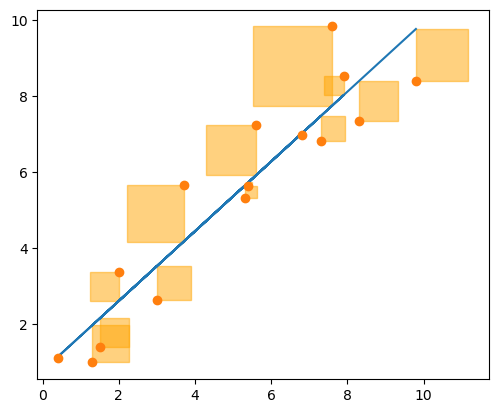

In [52]:
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

fig, ax = plt.subplots()
ax.set_aspect('equal')

# plot squares 
for x,y in zip(X,Y): 
    residual = m*x+b - y
    ax.add_patch(Rectangle((x, y), residual, residual, alpha=.5, color='orange'))

plt.plot(X, m*X+b)
plt.plot(X, Y, 'o') # scatterplot
plt.show()

## Stochastic Gradient Descent

It would be remiss to not at least mention **stochastic gradient descent**, a variant of gradient descent that randomly samples only one or more training datapoints in each iteration. This is done because traversing the entire dataset can be computationally expensive for larger datasets and complex models like deep learning. Below, we only randomly sample one datapoint in each iteration. You will notice the line does not fit as aggressively, and some randomness will produce different $ m $ and $ b $ values each time. That is likely okay as another purpose is to prevent overfitting.  

0.9420113876810049 0.8163865547654732


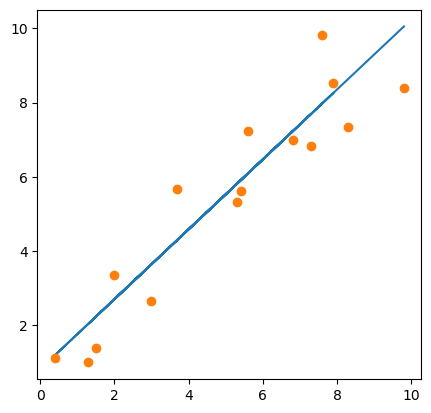

In [55]:
import numpy as np 
import pandas as pd
import random 
from sympy import *
import matplotlib.pyplot as plt

X = np.array([9.8, 8.3, 5.3, 1.3, 3, 0.4, 5.4, 7.3, 3.7, 6.8, 5.6, 2,7.6, 7.9, 1.5])

Y = np.array([8.383017, 7.35061323, 5.31904498, 0.99811892, 2.64478489, 1.12535641,
 5.62574367, 6.82704871, 5.66768037, 6.98267837, 7.23655439, 3.36467504,
 9.82253924, 8.52430761, 1.39760223])

# Building the model
m = 1.0
b = 1.0

# The learning Rate
L = .001

# The number of iterations
iterations = 100_000

n = float(len(X))  # Number of elements in X

# Perform Gradient Descent
for i in range(iterations):
    j = random.randint(0,len(X)-1)
    _x, _y = X[j], Y[j]
    
    # slope with respect to m
    D_m = 2 * _x * ((m * _x + b) - _y)

    # slope with respect to b
    D_b = 2 * ((m * _x + b) - _y)

    # update m and b
    m -= L * D_m
    b -= L * D_b
    
print(m, b)

# plot the result 
fig, ax = plt.subplots()
ax.set_aspect('equal')

plt.plot(X, m*X+b)
plt.plot(X, Y, 'o') # scatterplot
plt.show()

## EXERCISE 

Below we have a funciton that accepts input variables $ x $ and $ y $. 

$ \Large f(x,y) = 3 \left(x + 2\right)^{2} + 0.5 \left(y - 1\right)^{2} $

Find the $ x $ and $ y $ values that produces the lowest value in that function using gradient descent, and then plot it. Fill in the code below by replacing the question marks "?" and experimenting with the learning rate and iterations. 

In [58]:
from sympy import * 
from sympy.plotting import plot3d
import random 

# declare function and derivative
x,y = symbols('x y')
f = 3*(x+2)**2 + .5*(y-1)**2
dx = diff(f, x) 
dy = diff(f, y)

# declare learning rate 
L = ?

# start x at random location 
x_i = random.uniform(-10,10)
y_i = random.uniform(-10,10)

for i in range(?):
    dx_i = dx.subs(x, x_i)
    dy_i = dy.subs(y, y_i) 

    x_i -= dx_i * L 
    y_i -= dy_i * L 

    b = -(dx_i * x_i + dy_i * y_i - f.subs([(x, x_i), (y, y_i)]))

# print and plot result 
print(f"x = {x_i}, y = {y_i}")
plot3d(f, dx_i*x + dy_i * y + b, xlim=(-10,10),ylim=(-10,10))

SyntaxError: invalid syntax (2300151838.py, line 12)

### SCROLL DOWN FOR ANSWER
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
v 

You should converge at $ x = -2 $ and $ y = 1 $. A learning rate of $ .05 $ and $ 1000 $ iterations should be sufficient. 

In [ ]:
from sympy import * 
from sympy.plotting import plot3d
import random 

# declare function and derivative
x,y = symbols('x y')
f = 3*(x+2)**2 + .5*(y-1)**2
dx = diff(f, x) 
dy = diff(f, y)

# declare learning rate 
L = .05

# start x at random location 
x_i = random.uniform(-10,10)
y_i = random.uniform(-10,10)

for i in range(1000):
    dx_i = dx.subs(x, x_i)
    dy_i = dy.subs(y, y_i) 

    x_i -= dx_i * L 
    y_i -= dy_i * L 

    b = -(dx_i * x_i + dy_i * y_i - f.subs([(x, x_i), (y, y_i)]))

# print and plot result 
print(f"x = {x_i}, y = {y_i}")
plot3d(f, dx_i*x + dy_i * y + b, xlim=(-10,10),ylim=(-10,10))